# Testing Neural Network-based image segmentation models on your data
---
This notebook gives you access to several pre-installed segmentation models that can be easily run and compared on your image data-set. Please follow the instructions below to upload your data and test the models.

The notebook is licensed under CC BY-NC 4.0
Copyright (C) 2024 Franziska Oschmann, Scientific IT Services of ETH Zurich.

Contributing Authors:  Franziska Oschmann  together with  Andrzej Rzepiela (ScopeM ETH) and Szymon Stoma (ScopeM ETH).

# 1. Install dependencies
- The notebook runs on the **T4 accelator**. Select it in 'Runtime' by clicking 'Change runtime type'
- To run a code `cell` (separate piece of code), click on it and press the `play` button on the top left of it.
- It will take about 1 min to install dependencies in the cell below
- Ignore the restart warning message



In [1]:
%%capture
!pip install --no-deps git+https://github.com/ajrzepiela/midap.git@dev
!pip install -q --no-deps numpy==1.26.4 "scipy>=1.11.4,<1.12" scikit-image>=0.22 \
  opencv-python>=4.8.1 pandas>=2.0.2 stardist>=0.9.1 omnipose>=1.0.6 tqdm gitpython coverage mpl_interactions \
  ipympl csbdeep fastremap edt igraph texttable mgen pbr ncolor mahotas torchvf peakdetect
try:
  from gem.utils import graph_util, plot_util
except (ImportError, KeyError, ModuleNotFoundError):
  exit()

If you want to use the notebook more often, follow the instructions [here](https://medium.com/@ismailelalaoui/how-to-install-external-libraries-permanently-on-google-colab-eaa4509fb43f) to install dependencies permanently on your google drive

Now, **download the custome segmentation models**. Standard models are loaded from libraries.

In [12]:
!midap_download --force

## 2. Upload of images



- Run the `cell` below and later select the `data/raw_im/` data folder (don't miss the 'select' button that appears below the cell), and then run the second cell to select the files you want to analyse.

- This will take about 30 sec

- In `/content/data/raw_im/` there are several example images that can be used to test the notebook. If you want other images, upload them to the folder `/content/data/raw_im/`. To do this, in the panel on the left click on the folder icon and then drag and drop your image files into directory `/content/data/raw_im/`.

- Uploaded images should have the same size (the example set is 256x256, you can also remove it)


In [1]:
import os; os.environ["MATPLOTLIB_BACKEND"] = "module://ipympl.backend_nbagg"
import matplotlib
matplotlib.use('module://ipympl.backend_nbagg')
import matplotlib.pyplot as plt

from google.colab import output
output.enable_custom_widget_manager()

%matplotlib ipympl
from midap.midap_jupyter.segmentation_jupyter import SegmentationJupyter

path = '/content/data/'
sj = SegmentationJupyter(path = path)

sj.get_input_dir()
display(sj.fc_file)

FileChooser(path='/content/data', filename='', title='', show_hidden=False, select_desc='Select', change_desc=…

Please make sure that the folder has been selected. Then run the next cell to select the files (mark them with the mouse).

In [2]:
sj.get_input_files(sj.fc_file.selected)

SelectMultiple(description='Files', layout=Layout(height='250px', width='600px'), options=('image_2.tif', 'ima…

Button(description='Select', style=ButtonStyle())

## 3. Choose image axes

This is where we define the labels for the image axes. We need to specify which axes contain the number of images and the number of channels in the uploaded image stack. Based on this information, the image stack will be transformed into the following shape (num_images, width, height, num_channels). Please run the two cells below and select the correct options.

In [4]:
sj.load_input_image()

In [5]:
sj.spec_img_dims()
sj.align_img_dims()

## 2. Select channel

Select the channel which will be used for the further analysis. If images in your set contain only one channel, keep the channel '0'. Please run both cells below.

In [6]:
%matplotlib ipympl
sj.select_channel()
display(sj.output_sel_ch)

interactive(children=(Dropdown(description='Channel', layout=Layout(width='50%'), options=(0,), value=0), IntS…

In [7]:
sj.set_channel()

## 3. Define ROI

Define the region of interest (the same for all the images) by zooming (zoom to rectangle tool) into the part of the image you want to segment. Run all the cells below.

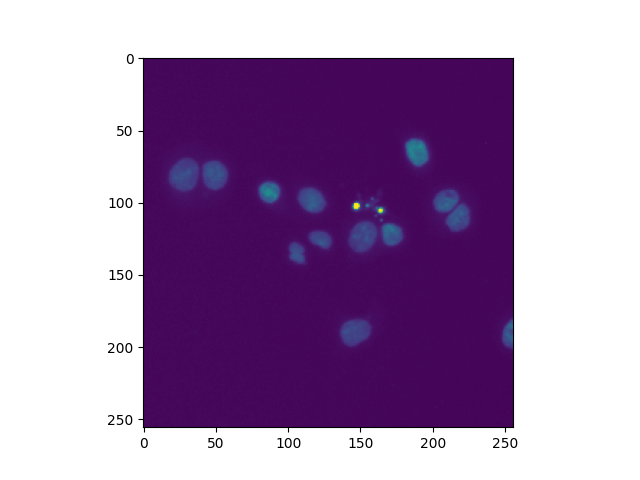

In [8]:
%matplotlib ipympl
sj.show_example_image(sj.imgs_sel_ch[0,:,:,0])

In [9]:
sj.get_corners_cutout()
sj.make_cutouts()

%matplotlib ipympl
sj.show_all_cutouts()
sj.output_all_cuts

interactive(children=(IntSlider(value=0, description='Image ID', max=3), Output()), _dom_classes=('widget-inte…

In [10]:
sj.save_cutouts()

## 4. Model selection

You can choose between different models trained on different species, markers and neural network types. Select the models by running the cell below and clicking through the options (the selected models will appear in the list below the cell).

In [13]:
sj.get_segmentation_models()
sj.display_segmentation_models()
#sj.outp_interact_table

- By running the following cell, segmentations with all selected models are generated and displayed for comparison.

- This will take some time depending on how many models and images you have

In [15]:
# run all models
sj.select_segmentation_models()
sj.run_all_chosen_models()

25-06-19 18:07:02 base_segmentator.py INF   TensorFlow will run on GPU(s): ['/physical_device:GPU:0'] 
Found model '2D_paper_dsb2018' for 'StarDist2D'.
5231396/5231396 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


functional.py (237): The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1, 256, 256, 1))


25-06-19 18:07:10 base_segmentator.py INF   TensorFlow will run on GPU(s): ['/physical_device:GPU:0'] 
https://www.cellpose.org/models/nucleitorch_0 /root/.cellpose/models/nucleitorch_0


100%|██████████| 25.3M/25.3M [00:00<00:00, 32.2MB/s]


  0%|          | 0/4 [00:00<?, ?it/s]

https://www.cellpose.org/models/worm_bact_omnitorch_0 /root/.cellpose/models/worm_bact_omnitorch_0


100%|██████████| 25.3M/25.3M [00:00<00:00, 223MB/s]


  0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
sj.compare_segmentations()
sj.output_seg_comp

interactive(children=(Dropdown(description='Model 1', layout=Layout(width='50%'), options=('StarDistSegmentati…

Choose the name of the model weights giving the best segmentation result:

In [18]:
sj.display_buttons_weights()
display(sj.out_weights)

RadioButtons(description='Model weights:', layout=Layout(width='100%'), options=('StarDistSegmentationJupyter_…

## 5. Save segmentations

Based on the chosen model and model weights, the whole image stack will be segmented. In case you would like to upload an additional file for the segmentation, please do that below.

In [17]:
sj.load_add_files()
sj.out_add_file

interactive(children=(Checkbox(value=False, description='Do you want to select an additional dataset for the s…

In [ ]:
sj.process_images()

  0%|          | 0/3 [00:00<?, ?it/s]

You find the segmented images under `/content/data/seg_im/`.